# Метод опорных векторов

Метод опорных векторов (SVM) - это метод, который использует точки в преобразованном пространстве задач, которые лучше всего разделяют классы на две группы. Классификация для нескольких классов затем поддерживается методом "один против всех" (one-vs-all method) (так же, как мы ранее делали для логистической регрессии для многоклассовой классификации).
Эта лекция будет разбита на следующие разделы:

    Часть 1: Введение в Метод опорных векторов
    Часть 2: Общее объяснение SVM
    Часть 3: Вычисление гиперплоскости
    Часть 4: Дополнительные математические ресурсы
    Часть 5: SVM со Sci Kit Learn
    Часть 6: Дополнительные ресурсы


## Часть 1: Введение в Метод опорных векторов

Формальное объяснение:

В машинном обучении Метод опорных векторов (SVM) представляет собой управляемые модели обучения с соответствующими алгоритмами обучения, которые анализируют данные и распознают шаблоны, используемые для классификации и регрессионного анализа. Учитывая набор обучающих примеров, каждый из которых помечен для принадлежности к одной из двух категорий, алгоритм обучения SVM строит модель, которая назначает новые примеры в ту или иную категорию, что делает его не вероятностным бинарным линейным классификатором. Модель SVM - это представление примеров в виде точек в пространстве, отображенных таким образом, что примеры отдельных категорий разделены четким промежутком, который является максимально широким. Новые примеры затем сопоставляются в том же самом пространстве и предсказываются, чтобы принадлежать к категории, основанной на том, на какую сторону разрыва они попадают.

Преимущества Метода опорных векторов заключаются в следующем:

* Эффективен в пространствах с высокой размерностью.
* По-прежнему эффективен в тех случаях, когда число измерений превышает число объектов.
* Использует подмножество обучающих точек в функции принятия решения (называемых опорными векторами), поэтому он также эффективен в отношении памяти.
* Универсальность: для функции принятия решений могут быть заданы различные функции ядра. Можно использовать стандартные ядра, но также можно указать пользовательские.

К недостаткам метода опорных векторов относятся:

* Если число признаков значительно превышает число выборок, то метод, скорее всего, даст плохие результаты.
* SVM напрямую не предоставляют оценки вероятности, они рассчитываются с использованием дорогостоящей пятикратной перекрестной проверки (см. оценки и вероятности ниже).

Давайте пойдем дальше и разберем главную идею SVMs!

## Часть 2: Общее объяснение SVM 

Мы начнем с того, что представим себе ситуацию, в которой мы хотим разделить тренировочный набор на два класса. У нас есть два класса в нашем наборе: синий и красный. Мы вычерчиваем их в пространстве объектов и пытаемся разместить зеленую линию, разделяющую оба класса.

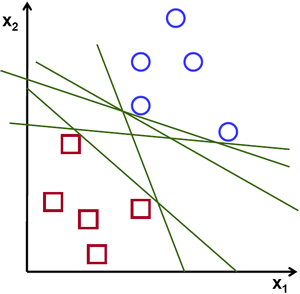

In [1]:
from IPython.display import Image
url = 'http://docs.opencv.org/_images/separating-lines.png'
Image(url)

На рисунке выше мы видим, что у нас есть несколько способов рисования этой линии (которую мы будем называть гиперплоскостью), которые могут полностью разделить классы. Так какая же линия оптимальна?

Мы решаем, что оптимальной гиперплоскостью, разделяющей эти два класса, является та, которая имеет максимальное расстояние между двумя классами, как показано на рисунке ниже:

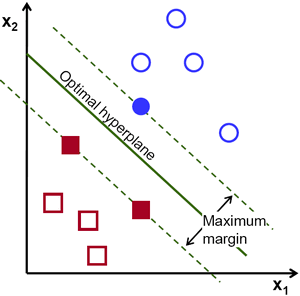

In [2]:
url= 'http://docs.opencv.org/_images/optimal-hyperplane.png'
Image(url)

Так как же мы на самом деле математически вычисляется эта оптимальнуя гиперплоскость? Я объясню очень кратко ниже в части 3, но я настоятельно рекомендую вам прочитать полное объяснение на [Википедии](http://en.wikipedia.org/wiki/Support_vector_machine) или в видеозаписях лекций, следующих за частью 3.

## Часть 3: Вычисление гиперплоскости

Давайте продолжим и начнем с определения гиперплоскости в этом случае с уравнения прямой, где транспонированная Бета - это известный вектор веса объектов, которые мы видели раньше, А Бета-ноль - это смещение.

$$ f(x) = \beta_{0} + \beta^{T} x $$

Существует бесконечное количество способов масштабирования вектора веса и смещения, но помните, что мы хотим максимизировать разницу между этими двумя классами. Таким образом, мы понимаем, что с помощью некоторой математики (подробно объясненной в видео ниже) можно установить это как:

$$ |\beta_{0} + \beta^{T} x| = 1 $$

где x символизирует учебные примеры, наиболее близкие к гиперплоскости. В общем случае обучающие примеры, наиболее близкие к гиперплоскости, называются опорными векторами. Эти опорные векторы заполнены цветом на изображении выше. Это представление известно как каноническая гиперплоскость.

Из геометрии мы знаем, что расстояние между точкой x и гиперплоскостью (Beta,Beta<sub>0</sub>) равно:

$$\mathrm{distance} = \frac{|\beta_{0} + \beta^{T} x|}{||\beta||}.$$

В частности, для канонической гиперплоскости числитель равен единице, а расстояние до опорных векторов равно:

$$\mathrm{distance}_{\text{ support vectors}} = \frac{|\beta_{0} + \beta^{T} x|}{||\beta||} = \frac{1}{||\beta||}$$

Напомним, что поле, введенное в предыдущем разделе, здесь обозначается как M - это в два раза большее расстояние до ближайших примеров:

$$M = \frac{2}{||\beta||}$$

Наконец, задача максимизации M эквивалентна задаче минимизации функции L (Бета) с учетом некоторых ограничений. Ограничения моделируют требование к гиперплоскости правильно классифицировать все обучающие примеры x<sub>i</sub>.

Формально,

$$\min_{\beta, \beta_{0}} L(\beta) = \frac{1}{2}||\beta||^{2} \text{ subject to } y_{i}(\beta^{T} x_{i} + \beta_{0}) \geq 1 \text{ } \forall i$$

где y<sub>i</sub> представляет каждую из меток обучающих примеров.

Это задача [Оптимизации Лагранжа](http://en.wikipedia.org/wiki/Lagrange_multiplier) которые могут быть решены с помощью множителей Лагранжа для получения весов вектора бета и смещения бета<sub>0</sub> из оптимальной гиперплоскости.

Если мы хотим сделать нелинейную классификацию, мы можем использовать [kernel trick](http://en.wikipedia.org/wiki/Kernel_method). Используя kernel trick, мы можем "нарезать" пространство признаков гиперплоскостью. Для быстрой иллюстрации того, как это выглядит, проверьте оба изображения и видео ниже!

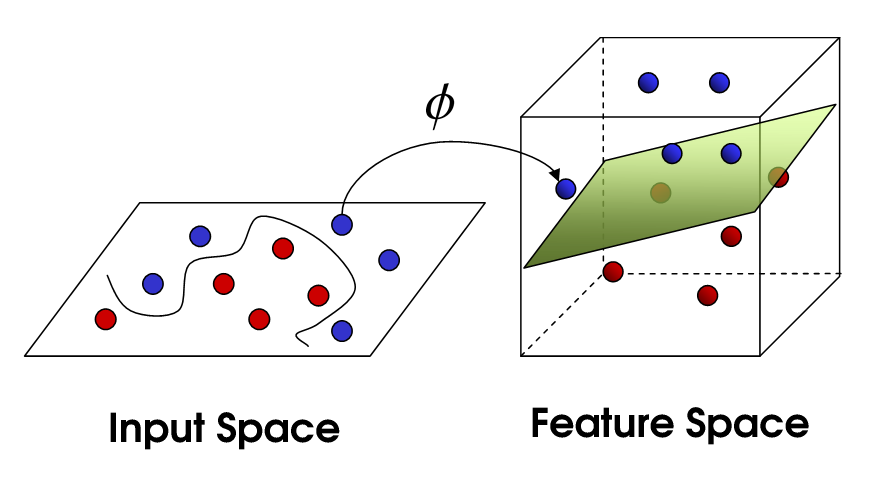

In [3]:
# Kernel Trick for the Feature Space
url='http://i.imgur.com/WuxyO.png'
Image(url)

In [4]:
# Kernel Trick Visualization
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

## Часть 4: Дополнительные математические ресурсы

Ниже приведены видео-ссылки на бесплатные ресурсы для более глубокого погружения в Метод опорных векторов.
Для начала лекция от Andrew Ng и затем лекция из MIT Open CourseWare

In [5]:
# Andrew Ng Lecture
YouTubeVideo('qdnT_jGTg2s')

####MIT лекция

In [6]:
# MIT Lecture
YouTubeVideo('_PwhiWxHK8o')

## Часть 5: SVM с Sci Kit Learn

Теперь мы готовы перейти к некоторым кодам Python и Sci Kit Learn, мы начнем с некоторых основных импортруемых операций, и мы будем импортировать Sci Kit Learn далее, пока мы их используем.

In [7]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Note, we won't use seaborn due to a plot at the end.

Сначала мы начнем с импорта набора данных, с которым мы уже очень хорошо знакомы, - набора данных Iris

In [8]:
from sklearn import datasets

# load the iris datasets
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

Теперь мы импортируем [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (классификация опорных векторов) из библиотеки [SVM библиотека в Sci Kit Learn](http://scikit-learn.org/stable/modules/svm.html), Я призываю вас просмотреть другие типы параметров SVM в документации SciKit Learn!

In [9]:
# Support Vector Machine Imports
from sklearn.svm import SVC

Теперь мы создадим модель классификации опорных векторов для данных.

In [10]:
# Fit a SVM model to the data
model = SVC()

Теперь мы разделим данные на обучающий набор и тестовый набор, а затем обучим нашу модель.

In [11]:
from sklearn.cross_validation import train_test_split
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [12]:
# Fit the model
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

А теперь мы пойдем дальше и посмотрим, насколько хорошо сработала наша модель!

In [13]:
from sklearn import metrics

# Get predictions
predicted = model.predict(X_test)
expected = Y_test

# Compare results
print metrics.accuracy_score(expected,predicted)

1.0


Похоже, что мы достигли точности 97,4% с помощью классификации опорных векторов!

Теперь, когда мы прошли через базовую реализацию SVM, давайте продолжим и быстро рассмотрим различные типы ядер, которые мы можем использовать для классификации. Мы можем сделать это, вычерчивая границы, созданные каждым типом ядра! Мы начнем с импорта и настройки данных.

Четыре метода, которые мы будем исследовать, - это две линейные модели, Гауссова [Радиальная Базисная функция](http://en.wikipedia.org/wiki/Radial_basis_function),и SVC с полиномиальным (3-й степени) ядром.

Линейные модели LinearSVC() и SVC(kernel='linear') дают несколько иные границы принятия решений. Это может быть следствием следующих различий:

* LinearSVC минимизирует квадратичные потери hinge loss, в то время как SVC минимизирует постонные потери hinge loss.
* LinearSVC использует One-vs-All (также известный как One-vs-Rest) сокращение мультикласса, в товремя как SVC использует One-vs-One сокращение мультикласса.

In [14]:
# Import all SVM 
from sklearn import svm

# We'll use all the data and not bother with a split between training and testing. We'll also only use two features.
X = iris.data[:,:2]
Y = iris.target

# SVM regularization parameter
C = 1.0  

# SVC with a Linear Kernel  (our original example)
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

Теперь, когда мы установили четыре модели, мы пойдем дальше и начнем процесс настройки визуальных графиков. Примечание: этот пример взят из документации SciKit Learn.

Сначала мы определяем сетку для построения графика. Мы определяем максимум и минимум графика для осей y и x по наименьшим и наибольшим объектам в наборе данных. Мы можем использовать встроенный [метод](http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) библиотеки numpy, чтобы построить наш график.

In [32]:
# Set the step size
h = 0.02

# X axis min and max
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y axis min and max
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# Finally, numpy can create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Теперь подпишем график

In [33]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

Наконец, мы пройдем через каждую модель, установим их положение в виде подмножества, затем разбросаем точки данных и нарисуем контур границ принятия решения.

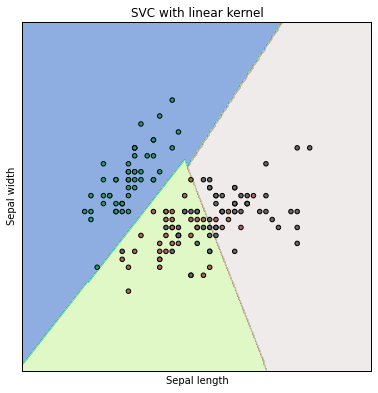

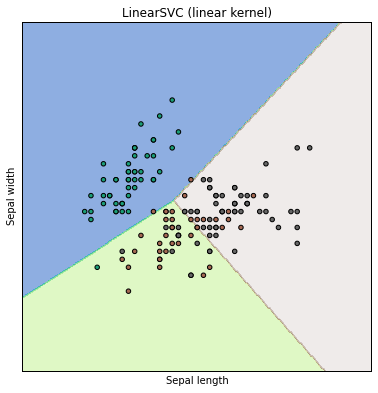

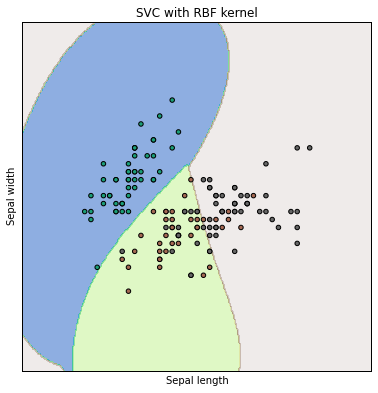

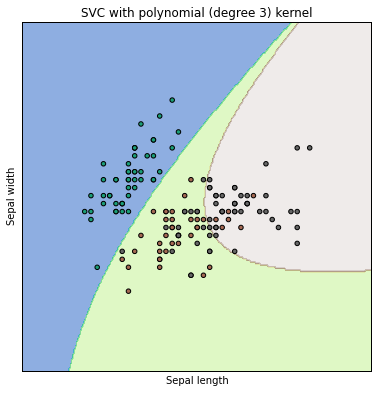

In [44]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()

##Часть 6: Дополнительные ресурсы

1.) [Microsoft Research Paper SVM Tutorial](http://research.microsoft.com/pubs/67119/svmtutorial.pdf)

2.) [StatSoft Online Textbook](http://www.statsoft.com/Textbook/Support-Vector-Machines)

3.) [Sci Kit Learn Documentation](http://scikit-learn.org/stable/modules/svm.html)

4.) [Wikipedia](http://en.wikipedia.org/wiki/Support_vector_machine)

5.) [Columbia Lecture Slides](http://www.cs.columbia.edu/~kathy/cs4701/documents/jason_svm_tutorial.pdf)

6.) [Andrew Ng's Class Notes](http://cs229.stanford.edu/notes/cs229-notes3.pdf)